# Projeto 2 - Ciência dos Dados - 2020.2 

### Previsão da demanda em lojas Walmart estadunidenses a fim de evitar o desperdício, maximizando o lucro nesses estabelecimentos

#### Equipe: Andressa Silva de Oliveira; Camila Buzin Ladeira; Luiz Ricardo Hardman; Matheus Kwon

## - Introdução -

##### Objetivo:
A previsão de dados é extremamente valiosa nas mais diversas áreas, sendo utilizada para otimizar processos e serviços variados. No contexto em questão, a previsão de vendas em lojas Walmart é fundamental para que haja um controle adequado do estoque de acordo com a demanda; a redução nas perdas leva à otimização dos lucros nesses estabelecimentos. Dessa forma, objetiva-se construir, ao longo deste arquivo, dois modelos de previsão.


##### Descrição da base de dados:

Pensando em como nos dias atuais a habilidade de prever futuras vendas de uma empresa é um fator importante para montar um business plan, analisamos então no nosso projeto uma base de dados das vendas semanais  do Walmart , onde poderíamos relacionar fatores internos ou externos ao comportamento dessas vendas. Utilizamos apenas uma base de dados que nos traziam informação de lojas, datas, temperatura, taxa de desemprego, momentos de feriado, etc..

Base de dados Walmart_Store_sales :

- **store**: representa a numeração da loja representada, 1-45;
- **data**: variável que apresenta dia, mês e ano do dado, respectivamente, representando a semana que as observações foram tomadas;
- **weeklysales** : variável que apresenta a receita de cada loja semanalmente (US\$) $\Rightarrow\$ variável de monitoramento;
- **holiday**: variável que representa se a data do dado é feriado ou não (yes/no);
- **temperature** : variável que apresenta a temperatura média da semana na região de  cada loja, em fahrenheit (°F);
- **fuel**: preço do galão de gasolina no dia do dado (US\$);
- **cpi** : variável que representa o preço médio necessário para comprar um conjunto de bens de consumo e serviços num país no dia, comparando com períodos anteriores.( Índice de preços no consumidor )  (US\$);
- **unemployment** : variável que representa a taxa de desemprego durante a semana, na região de cada loja, de zero a um.

## - Minerando Dados e Características do Dataset -

In [1]:
# Bibliotecas importadas:
import os
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Código para reconhecimento do dataset:
filename = 'Walmart_Store_sales.xlsx'

if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo!')
else:
    print(f'Não encontrei o arquivo {filename} no diretório {os.getcwd()}')

Encontrei o arquivo Walmart_Store_sales.xlsx, tudo certo!


In [3]:
# Código para leitura do dataset:
data = pd.read_excel(filename)
data.head(5)

,"Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment"
0,"1,05-02-2010,1643690.9,0,42.31,2.572,211.09635..."
1,"1,12-02-2010,1641957.44,1,38.51,2.548,211.2421..."
2,"1,19-02-2010,1611968.17,0,39.93,2.514,211.2891..."
3,"1,26-02-2010,1409727.59,0,46.63,2.561,211.3196..."
4,"1,05-03-2010,1554806.68,0,46.5,2.625,211.35014..."


In [4]:
# Manipulação do dataset para fins do projeto

linhas = data['Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment']

dicio = {'store':[], 'date':[], 'weeklysales':[], 'holiday':[], 'temperature':[], 'fuel':[], 'cpi':[], 'unemployment':[]}

# Separação das colunas no dicionário, em forma de listas

for linha in linhas:
    results = linha.split(',')
    i = 0
    for key in dicio.keys():
        variable = results[i]
        if key != 'date' and key != 'store':
            variable = float(results[i])
        dicio[key].append(variable)
        i += 1


In [5]:
# Transformando o dicionário em dataframe:

df = pd.DataFrame()
for key, lista in dicio.items():
    df[key] = pd.Series(lista)

In [6]:
# Transformando as variáveis de acordo com o seu tipo:

df.holiday = df.holiday.astype('int')
df.store = df.store.astype('category') # define o número da loja como variável qualitativa ordinal
df.date = pd.to_datetime(df.date) # define a variável para datas
df.unemployment = (df.unemployment)/100 # taxa de desemprego(em porcentagem)/100
df

,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment
0,1,2010-05-02,1643690.90,0.0,42.31,2.572,211.096358,0.08106
1,1,2010-12-02,1641957.44,1.0,38.51,2.548,211.242170,0.08106
2,1,2010-02-19,1611968.17,0.0,39.93,2.514,211.289143,0.08106
3,1,2010-02-26,1409727.59,0.0,46.63,2.561,211.319643,0.08106
4,1,2010-05-03,1554806.68,0.0,46.50,2.625,211.350143,0.08106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0.0,64.88,3.997,192.013558,0.08684
6431,45,2012-05-10,733455.07,0.0,64.89,3.985,192.170412,0.08667
6432,45,2012-12-10,734464.36,0.0,54.47,4.000,192.327265,0.08667
6433,45,2012-10-19,718125.53,0.0,56.47,3.969,192.330854,0.08667


#### Descrição das variáveis:

* store: representa a numeração da loja representada;

* data: variável que apresenta dia, mês e ano do dado, respectivamente;

* **weeklysales : variável que apresenta a receita de cada loja semanalmente (US\$) $\Rightarrow\$ variável de monitoramento**;

* holiday: variável que representa se a data do dado é feriado ou não (1=yes/0=no);

* temperature : variável que apresenta a temperatura média do dia em cada loja, em fahrenheit (°F);

* fuel: preço do galão de gasolina no dia do dado (US\$);

* cpi : variável que representa o preço médio necessário para comprar um conjunto de bens de consumo e serviços num país no dia, comparando com períodos anteriores. (US\$);

* unemployment : variável que representa a taxa de desemprego no dia, em relação ao país, de zero a um.

### Análise descritiva detalhada das variáveis:

In [7]:
# Análise das variáveis quantitativas

df_analise1 = df[['weeklysales','temperature','fuel','cpi','unemployment']]
df_analise1.describe()

,weeklysales,temperature,fuel,cpi,unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,60.663782,3.358607,171.578394,0.079992
std,5.643666e+05,18.444933,0.459020,39.356712,0.018759
min,2.099862e+05,-2.060000,2.472000,126.064000,0.038790
25%,5.533501e+05,47.460000,2.933000,131.735000,0.068910
50%,9.607460e+05,62.670000,3.445000,182.616521,0.078740
75%,1.420159e+06,74.940000,3.735000,212.743293,0.086220
max,3.818686e+06,100.140000,4.468000,227.232807,0.143130


In [8]:
# Verificando se há valores indefinidos

df_analise1.isnull().sum()

weeklysales     0
temperature     0
fuel            0
cpi             0
unemployment    0
dtype: int64

C:\Users\camil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


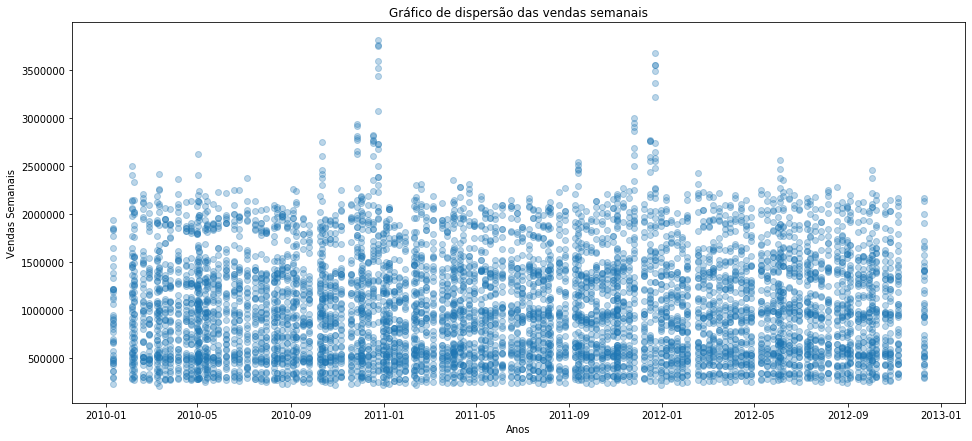

In [9]:
# Gráfico de dispersão das vendas semanais para todas as lojas ao longo do período 2010 a 2012

plt.figure(figsize=(16, 7))
plt.title('Gráfico de dispersão das vendas semanais')
plt.xlabel('Anos')
plt.ylabel('Vendas Semanais')
plt.plot(df.date, df.weeklysales, 'o', alpha=0.3)
plt.show()

* A partir do gráfico acima, percebe-se que nas semanas próximas ao fim de cada ano ocorre, em geral, um aumento nas vendas semanais

Store 12, year 2011


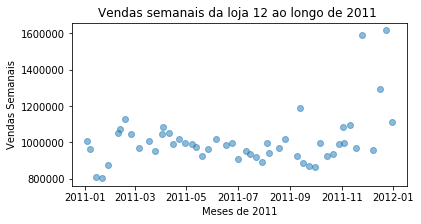

Store 25, year 2012


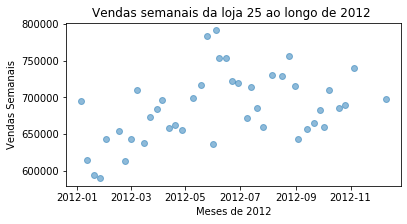

Store 22, year 2010


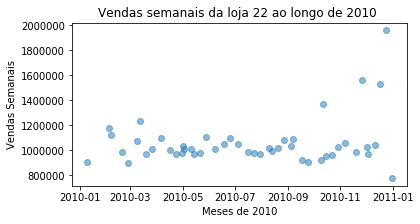

In [10]:
# Gráfico de dispersão das vendas semanais para lojas selecionadas aleatoriamente durante um ano selecionado
# também aleatoriamente

import random
teste_lojas = []
teste_anos = []
for x in range(3):
    
    a = True # loop para não repetir loja e ano
    while a == True:
        n = random.randint(1,45)
        year = random.randint(2010,2012)
        if n not in teste_lojas and year not in teste_anos:
            teste_lojas.append(n)
            teste_anos.append(year)
            a = False
    
    filtroano = []
    for i in df.date:
        if i.year == year:
            filtroano.append(True)
        else:
            filtroano.append(False)
    
    filtrostore = df.store == str(n)
    
    datesano = []
    for i in range(len(df)):
        if df.date[i].year == year and df.store[i] == str(n):
            datesano.append(df.date[i])
    
    salesyear = df.loc[filtroano & filtrostore,'weeklysales']
    
    print(f'Store {n}, year {year}')
    plt.figure(figsize=(6, 3))
    plt.title('Vendas semanais da loja {0} ao longo de {1} '.format(n,year))
    plt.ylabel('Vendas Semanais')
    plt.xlabel('Meses de {0}'.format(year))
    plt.plot(datesano, salesyear,'o', alpha=0.5)
    plt.show()

* Assim como observado no comportamento de todas as lojas juntas, percebe-se para cada loja que, em geral há um aumento nas vendas semanais no período próximo ao final do ano

In [11]:
# Análise da relação entre as variáveis weeklysales e holiday

no = df.holiday == 0
yes = df.holiday == 1

holiday_no = df.loc[no,["weeklysales"]]
holiday_yes = df.loc[yes,["weeklysales"]]

medidas_resumo_holiday_no = holiday_no.describe()
medidas_resumo_holiday_yes = holiday_yes.describe()

In [12]:
# Análise das medidas resumo para semanas sem feriado

medidas_resumo_holiday_no.round(3)

,weeklysales
count,5985.000
mean,1041256.380
std,558957.436
min,209986.250
25%,551378.390
50%,956211.200
75%,1414343.530
max,3818686.450


In [13]:
# Análise das medidas resumo para semanas com feriado

medidas_resumo_holiday_yes.round(3)

,weeklysales
count,450.000
mean,1122887.892
std,627684.932
min,215359.210
25%,575865.482
50%,1018538.040
75%,1555213.175
max,3004702.330


* Analisando-se as medidas resumo obtidas acima, percebe-se que, quando há feriado, a média das vendas semanais é maior. No entanto, nessas mesmas semanas observa-se também uma variância maior, o que significa que há lojas com vendas bem maiores que outras e também que há feriados em que as vendas são maiores do que em outros.

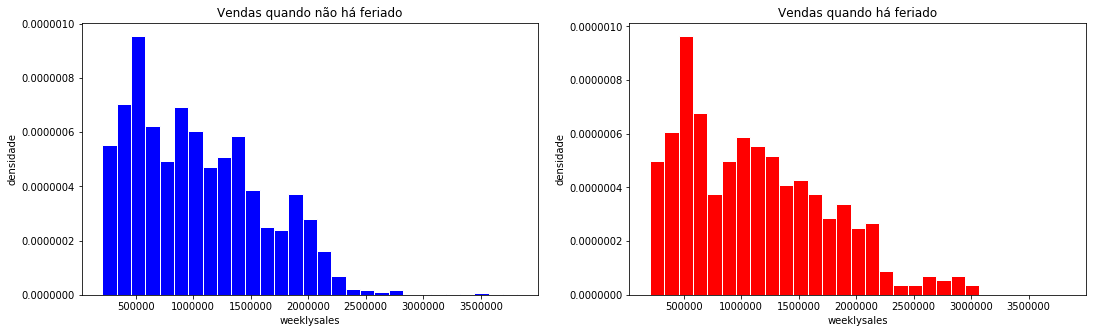

In [14]:
# Análise, em histograma, das vendas semanais para semanas em que não há ou não feriado

faixas = np.linspace(df.weeklysales.min(),df.weeklysales.max(),30)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(holiday_no.weeklysales, bins=faixas, density=True, color='blue', edgecolor='white')
plt.ylabel('densidade')
plt.xlabel('weeklysales')
plt.title('Vendas quando não há feriado')

plt.subplot(122)
plt.hist(holiday_yes.weeklysales, bins=faixas, density=True, color='red', edgecolor='white')
plt.ylabel('densidade')
plt.xlabel('weeklysales')
plt.title('Vendas quando há feriado')

plt.show()

In [15]:
# Criando faixas de temperatura correspondentes às estações - temperatura mínima a 40° F, 40° F a 55° F, 55° F a temperatura máxima

temp_minima = df.temperature.min()
temp_maxima = df.temperature.max()

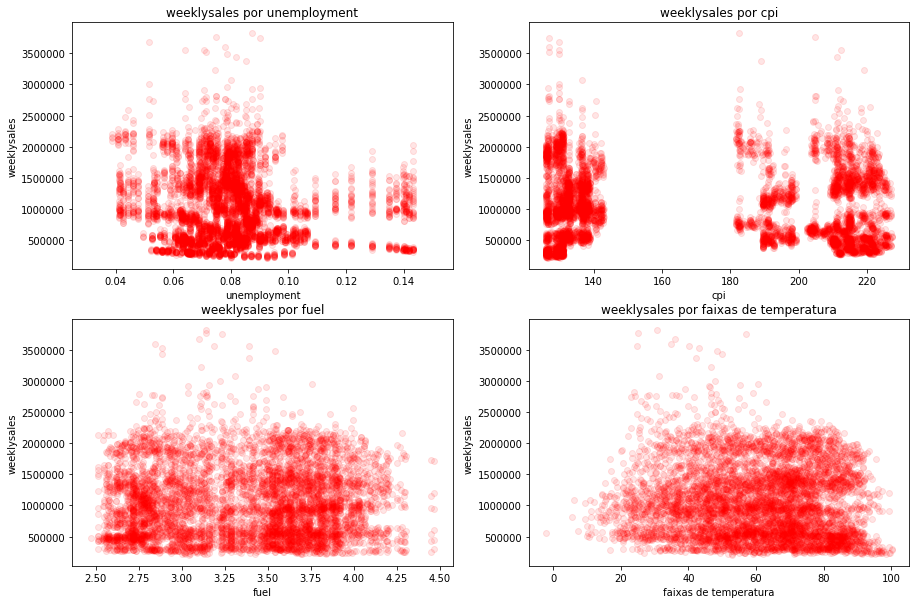

In [16]:
fig = plt.figure(figsize=(15,10))

# weeklysales com unemployment
plt.subplot(221)
plt.scatter(df.unemployment, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por unemployment')
plt.ylabel('weeklysales')
plt.xlabel('unemployment')

# weeklysales com cpi
plt.subplot(222)
plt.scatter(df.cpi, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por cpi')
plt.ylabel('weeklysales')
plt.xlabel('cpi')

# weeklysales com fuel
plt.subplot(223)
plt.scatter(df.fuel, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por fuel')
plt.ylabel('weeklysales')
plt.xlabel('fuel')

# weeklysales com temperature
plt.subplot(224)
plt.scatter(df.temperature, df.weeklysales, c='red', alpha=0.1)
plt.title('weeklysales por faixas de temperatura')
plt.ylabel('weeklysales')
plt.xlabel('faixas de temperatura')

plt.show()

In [17]:
# Correlações referentes às variáveis ilustradas nos gráficos acima

nomes = ['unemployment','cpi', 'fuel', 'temperature','holiday']
dfs = [df.unemployment, df.cpi, df.fuel, df.temperature, df.holiday]
for i in range(len(nomes)):
    print('Correlação entre {0} e weeklysales é: {1}'.format(nomes[i], df.weeklysales.corr(dfs[i])))

Correlação entre unemployment e weeklysales é: -0.10617608965795428
Correlação entre cpi e weeklysales é: -0.07263416204017631
Correlação entre fuel e weeklysales é: 0.009463786314475123
Correlação entre temperature e weeklysales é: -0.0638100131794696
Correlação entre holiday e weeklysales é: 0.03689096801041456


* As correlações nos mostram uma baixa relação entre as features e o target. Sendo assim, teremos que fazer uma análise de múltiplas features

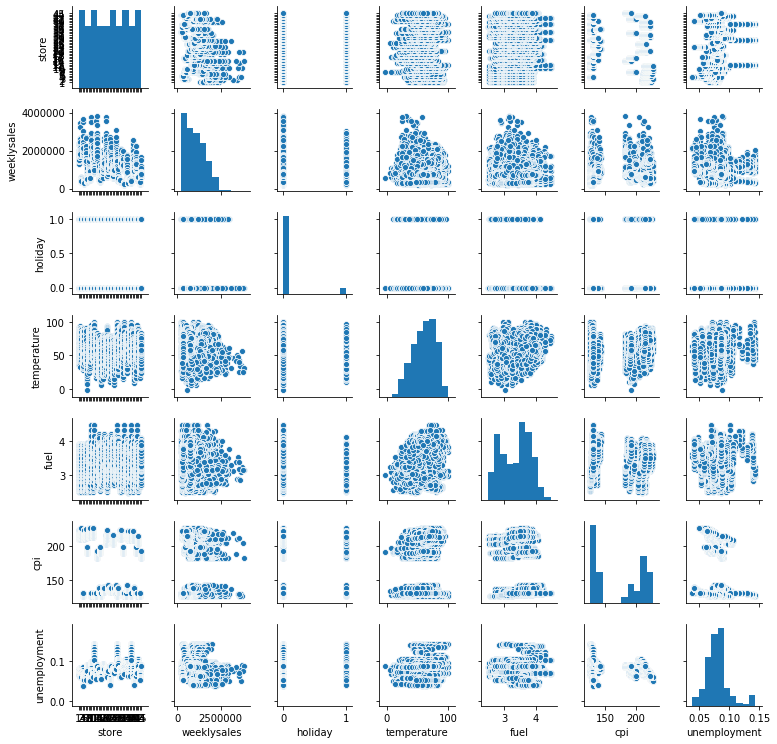

In [18]:
# Pairplot com as combinações de todas as variáveis quantitativas envolvidas

sns.pairplot(df, height=1.5);

## - Modelos de Predição -

In [19]:
x = df.date.dt.year
df['year'] = pd.Series(x)
y = df.date.dt.month
df['month'] = pd.Series(y)
df

df.year = df.year.astype('int')
df.month = df.month.astype('int')

In [20]:
df.dtypes

store                 category
date            datetime64[ns]
weeklysales            float64
holiday                float64
temperature            float64
fuel                   float64
cpi                    float64
unemployment           float64
year                     int32
month                    int32
dtype: object

In [21]:
df_shuffle = df.sample(frac = 1) 
df_treinamento = df_shuffle.head(int(len(df)*(0.75)+1))
df_teste = df_shuffle.tail(int(len(df)*(0.25)))

In [22]:
df_treinamento

,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment,year,month
1026,8,2010-07-30,787295.09,0.0,76.02,2.640,214.741873,0.06315,2010,7
1595,12,2010-09-07,943506.28,0.0,90.37,3.100,126.151800,0.14180,2010,9
6281,44,2012-08-17,327389.51,0.0,79.40,3.545,130.790968,0.05407,2012,8
1468,11,2010-10-29,1195036.00,0.0,74.21,2.716,215.227469,0.07564,2010,10
2305,17,2010-04-06,876902.87,0.0,53.79,2.871,126.136065,0.06635,2010,4
...,...,...,...,...,...,...,...,...,...,...
4737,34,2010-11-06,954681.56,0.0,80.84,2.668,126.111903,0.09593,2010,11
4956,35,2011-11-25,1733822.40,1.0,47.88,3.492,140.421786,0.08745,2011,11
4729,34,2010-04-16,923344.54,0.0,59.18,2.810,126.562100,0.09593,2010,4
3920,28,2011-03-25,1201059.72,0.0,54.40,3.909,128.616064,0.14021,2011,3


In [23]:
df_teste

,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment,year,month
2982,21,2012-08-06,707895.72,0.0,79.47,3.452,221.387747,0.06891,2012,8
1907,14,2011-07-01,1864746.10,0.0,34.32,3.193,182.598306,0.08549,2011,7
2781,20,2011-04-29,1881788.19,0.0,62.97,3.962,208.638600,0.07287,2011,4
522,4,2011-11-18,2243946.59,0.0,50.44,3.294,129.826833,0.05143,2011,11
545,4,2012-04-27,2064065.66,0.0,76.47,3.810,131.126667,0.04308,2012,4
...,...,...,...,...,...,...,...,...,...,...
4939,35,2011-07-29,770820.27,0.0,79.41,3.829,139.893310,0.08684,2011,7
782,6,2011-05-20,1382783.83,0.0,72.01,3.907,217.289610,0.06855,2011,5
1237,9,2011-11-18,542414.27,0.0,58.80,3.308,221.880392,0.06054,2011,11
554,4,2012-06-29,2128362.92,0.0,84.23,3.257,130.756267,0.04308,2012,6


* 1° modelo a ser utilizado: Modelo de Regressão Linear Múltipla - adotando $α = 1\%$

* Hipóteses:

**H0: não há relação entre weeklysales e a variável analisada - $β = 0$**

**H1: há relação entre weeklysales e a variável analisada - $β ≠ 0$**

In [24]:
# Regressão linear múltipla para a combinação weeklysales com holiday, temperature, fuel, cpi, unemployment, year e
# month; todas as variáveis quantitativas.

x = df_treinamento[['holiday','temperature','fuel','cpi','unemployment', 'year', 'month']]
y = df_treinamento['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

C:\Users\camil\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     24.16
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.50e-32
Time:                        11:05:43   Log-Likelihood:                -70730.
No. Observations:                4827   AIC:                         1.415e+05
Df Residuals:                    4819   BIC:                         1.415e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.42e+08   3.67e+07      3.865      0.000       7e+07    2.14e+08
holiday       5.489e+04    3.4e+04      1.614      0.107   -1.18e+04    1.22e+05
temperature  -1434.4952    469.398     -3.056      0.002   -2354.730    -514.261
fuel          8.611e+04   3.16e+04      2.727      0.006    2.42e+04    1.48e+05
cpi          -1437.7242    235.980     -6.093      0.000   -1900.352    -975.096
unemployment -4.418e+06   4.76e+05     -9.288      0.000   -5.35e+06   -3.49e+06
year         -6.994e+04   1.83e+04     -3.819      0.000   -1.06e+05    -3.4e+04
month         9197.8317   2626.628      3.502      0.000    4048.442    1.43e+04
==============================================================================
Omnibus:                      256.578   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.812
Skew:                           0.606   Prob(JB):                     2.14e-65
Kurtosis:                       2.886   Cond. No.                     9.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* A probabilidade de |t| de holiday é muito maior do que o alpha adotado, então, como H0 não é rejeitado, conclui-se que não há relação significativa para o modelo entre weeklysales e holiday.

In [25]:
# Regressão linear múltipla para a combinação weeklysales com temperature, fuel, cpi, unemployment, year e month

x = df_treinamento[['temperature','fuel','cpi','unemployment', 'year', 'month']]
y = df_treinamento['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     27.74
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           9.62e-33
Time:                        11:05:46   Log-Likelihood:                -70731.
No. Observations:                4827   AIC:                         1.415e+05
Df Residuals:                    4820   BIC:                         1.415e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.387e+08   3.67e+07      3.779      0.000    6.67e+07    2.11e+08
temperature  -1563.3499    462.633     -3.379      0.001   -2470.321    -656.378
fuel           8.29e+04   3.15e+04      2.630      0.009    2.11e+04    1.45e+05
cpi          -1430.0137    235.971     -6.060      0.000   -1892.624    -967.403
unemployment -4.376e+06   4.75e+05     -9.213      0.000   -5.31e+06   -3.45e+06
year         -6.827e+04   1.83e+04     -3.733      0.000   -1.04e+05   -3.24e+04
month         1.066e+04   2465.864      4.323      0.000    5825.467    1.55e+04
==============================================================================
Omnibus:                      258.631   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.338
Skew:                           0.608   Prob(JB):                     6.06e-66
Kurtosis:                       2.878   Cond. No.                     9.20e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* A probabilidade de |t| de fuel é relativamente alta, então, a variável é desconsiderada da inferência.

In [26]:
# Regressão linear múltipla para a combinação weeklysales com temperature, cpi, unemployment, year e month

x = df_treinamento[['temperature', 'cpi','unemployment', 'year', 'month']]
y = df_treinamento['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     31.87
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           4.70e-32
Time:                        11:05:55   Log-Likelihood:                -70734.
No. Observations:                4827   AIC:                         1.415e+05
Df Residuals:                    4821   BIC:                         1.415e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.012e+07   2.13e+07      2.819      0.005    1.83e+07    1.02e+08
temperature  -1309.9665    452.770     -2.893      0.004   -2197.603    -422.330
cpi          -1650.4435    220.724     -7.477      0.000   -2083.163   -1217.724
unemployment -4.215e+06   4.71e+05     -8.943      0.000   -5.14e+06   -3.29e+06
year         -2.906e+04   1.06e+04     -2.741      0.006   -4.98e+04   -8274.961
month         1.135e+04   2453.348      4.626      0.000    6540.691    1.62e+04
==============================================================================
Omnibus:                      259.338   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              301.618
Skew:                           0.610   Prob(JB):                     3.20e-66
Kurtosis:                       2.891   Cond. No.                     5.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* A probabilidade de |t| de year é maior do que o alpha adotado, então, como H0 não é rejeitado, conclui-se que não há relação significativa para o modelo entre weeklysales e year

In [27]:
# Regressão linear múltipla para a combinação weeklysales com cpi e unemployment

x = df_treinamento[['temperature', 'cpi','unemployment', 'month']]
y = df_treinamento['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     37.91
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.83e-31
Time:                        11:06:08   Log-Likelihood:                -70738.
No. Observations:                4827   AIC:                         1.415e+05
Df Residuals:                    4822   BIC:                         1.415e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.656e+06   6.26e+04     26.446      0.000    1.53e+06    1.78e+06
temperature  -1434.5741    450.786     -3.182      0.001   -2318.321    -550.827
cpi          -1639.0227    220.833     -7.422      0.000   -2071.957   -1206.088
unemployment -3.905e+06   4.58e+05     -8.529      0.000    -4.8e+06   -3.01e+06
month         1.241e+04   2424.244      5.120      0.000    7658.929    1.72e+04
==============================================================================
Omnibus:                      265.814   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.837
Skew:                           0.620   Prob(JB):                     3.18e-68
Kurtosis:                       2.914   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Regressão linear múltipla para a combinação weeklysales com cpi, unemployment e month

x = df_treinamento[['cpi','unemployment', 'month']]
y = df_treinamento['weeklysales']

xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     47.08
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           5.55e-30
Time:                        11:06:09   Log-Likelihood:                -70743.
No. Observations:                4827   AIC:                         1.415e+05
Df Residuals:                    4823   BIC:                         1.415e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.618e+06   6.15e+04     26.295      0.000     1.5e+06    1.74e+06
cpi          -1795.4098    215.500     -8.331      0.000   -2217.888   -1372.931
unemployment -4.139e+06   4.52e+05     -9.152      0.000   -5.03e+06   -3.25e+06
month         1.185e+04   2420.162      4.897      0.000    7108.056    1.66e+04
==============================================================================
Omnibus:                      264.115   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.090
Skew:                           0.620   Prob(JB):                     7.62e-68
Kurtosis:                       2.986   Cond. No.                     9.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# RMS - erro no treinamento
soma = 0
for resid in results.resid:
    soma += resid**2
RMS_0 = np.sqrt(soma/len(df_treinamento))
RMS_0

560612.8165549551

* Verificando as suposições do modelo de regressão linear 

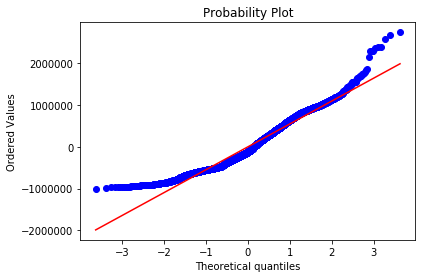

In [30]:
# Verificando a suposição de que os erros têm distribuição Normal

stats.probplot(results.resid, dist='norm', plot=plt);

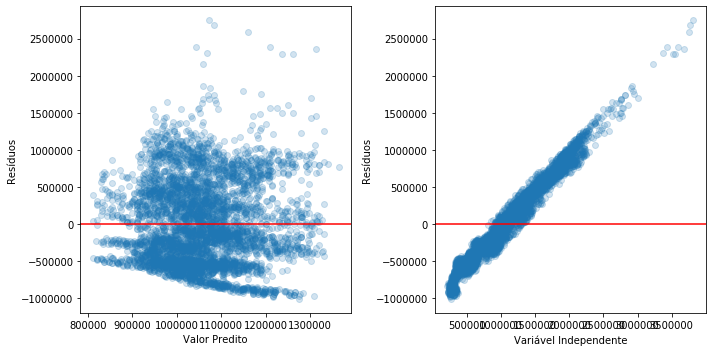

In [31]:
# Verificando a suposição de homocedasticidade:

fig = plt.figure(figsize = (10,5))

plt.subplot(121)
plt.scatter(results.predict(xc), results.resid, alpha=0.2);
plt.axhline(y = 0, color = 'r', linestyle = '-');
plt.ylabel('Resíduos')
plt.xlabel('Valor Predito')

plt.subplot(122)
plt.scatter(y, results.resid, alpha=0.2);
plt.axhline(y = 0, color = 'r', linestyle = '-'); # o valor da variável aleatórias está correto ?
plt.ylabel('Resíduos')
plt.xlabel('Variável Independente')

plt.tight_layout()
plt.show()

* Como evidenciado nos gráficos acima, as hipóteses do modelo não são seguidas. Dessa forma, afim de tentar ajustá-las, utilizou-se a escala logarítmica como ilustrado abaixo:

In [32]:
# Retira valores abaixo de 0

filtrotemperature1 = df_treinamento.temperature > 0
df_treinamento_log = df_treinamento.loc[filtrotemperature1,:]

filtrotemperature2 = df_teste.temperature > 0
df_teste_log = df_teste.loc[filtrotemperature2,:]

In [33]:
# Alterando a escala para log

df_treinamento_log.weeklysales = np.log(df_treinamento_log.weeklysales)
df_treinamento_log.temperature = np.log(df_treinamento_log.temperature)
df_treinamento_log.fuel = np.log(df_treinamento_log.fuel)
df_treinamento_log.cpi = np.log(df_treinamento_log.cpi)
df_treinamento_log.unemployment = np.log(df_treinamento_log.unemployment*100)
df_treinamento_log.month = np.log(df_treinamento_log.month)
df_treinamento_log.year = np.log(df_treinamento_log.year)
df_treinamento_log

C:\Users\camil\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment,year,month
1026,8,2010-07-30,13.576358,0.0,4.330996,0.970779,5.369437,1.842928,7.605890,1.945910
1595,12,2010-09-07,13.757358,0.0,4.503912,1.131402,4.837486,2.651833,7.605890,2.197225
6281,44,2012-08-17,12.698906,0.0,4.374498,1.265538,4.873600,1.687694,7.606885,2.079442
1468,11,2010-10-29,13.993687,0.0,4.306899,0.999160,5.371695,2.023400,7.605890,2.302585
2305,17,2010-04-06,13.684152,0.0,3.985088,1.054660,4.837361,1.892359,7.605890,1.386294
...,...,...,...,...,...,...,...,...,...,...
4737,34,2010-11-06,13.769133,0.0,4.392472,0.981329,4.837170,2.261034,7.605890,2.397895
4956,35,2011-11-25,14.365839,1.0,3.868698,1.250475,4.944651,2.168482,7.606387,2.397895
4729,34,2010-04-16,13.735758,0.0,4.080584,1.033184,4.840733,2.261034,7.605890,1.386294
3920,28,2011-03-25,13.998715,0.0,3.996364,1.363282,4.856832,2.640556,7.606387,1.098612


In [34]:
df_teste_log.weeklysales = np.log(df_teste_log.weeklysales)
df_teste_log.temperature = np.log(df_teste_log.temperature)
df_teste_log.fuel = np.log(df_teste_log.fuel)
df_teste_log.cpi = np.log(df_teste_log.cpi)
df_teste_log.unemployment = np.log(df_teste_log.unemployment*100)
df_teste_log.month = np.log(df_teste_log.month)
df_teste_log.year = np.log(df_teste_log.year)
df_teste_log

,store,date,weeklysales,holiday,temperature,fuel,cpi,unemployment,year,month
2982,21,2012-08-06,13.470052,0.0,4.375380,1.238954,5.399916,1.930216,7.606885,2.079442
1907,14,2011-07-01,14.438635,0.0,3.535728,1.160961,5.207289,2.145814,7.606387,1.945910
2781,20,2011-04-29,14.447733,0.0,4.142658,1.376749,5.340604,1.986092,7.606387,1.386294
522,4,2011-11-18,14.623747,0.0,3.920785,1.192103,4.866202,1.637637,7.606387,2.397895
545,4,2012-04-27,14.540188,0.0,4.336899,1.337629,4.876164,1.460474,7.606885,1.386294
...,...,...,...,...,...,...,...,...,...,...
4939,35,2011-07-29,13.555211,0.0,4.374624,1.342604,4.940880,2.161482,7.606387,1.945910
782,6,2011-05-20,14.139609,0.0,4.276805,1.362770,5.381231,1.924978,7.606387,1.609438
1237,9,2011-11-18,13.203785,0.0,4.074142,1.196344,5.402138,1.800719,7.606387,2.397895
554,4,2012-06-29,14.570864,0.0,4.433551,1.180807,4.873335,1.460474,7.606885,1.791759


In [35]:
df_analise2 = df_treinamento_log[['weeklysales','temperature','fuel','cpi','unemployment', 'year', 'month']]
df_analise2.describe()

,weeklysales,temperature,fuel,cpi,unemployment,year,month
count,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000,4826.000000
mean,13.710845,4.046960,1.201641,5.116614,2.054847,7.606368,1.679761
std,0.588426,0.366510,0.139482,0.232511,0.224372,0.000396,0.690300
min,12.254797,1.711995,0.921477,4.836790,1.355577,7.605890,0.000000
25%,13.235609,3.854711,1.076367,4.879665,1.931666,7.605890,1.386294
50%,13.781746,4.136446,1.236634,5.206432,2.063566,7.606387,1.791759
75%,14.174081,4.318521,1.317480,5.359272,2.154317,7.606885,2.197225
max,15.155417,4.606569,1.496941,5.425696,2.661168,7.606885,2.484907


In [36]:
# Verificando se há valores indefinidos

df_analise2.isnull().sum()

weeklysales     0
temperature     0
fuel            0
cpi             0
unemployment    0
year            0
month           0
dtype: int64

In [37]:
logx =  df_treinamento_log[['temperature','fuel','cpi','unemployment', 'month', 'year']]
logy = df_treinamento_log['weeklysales']

logxc = sm.add_constant(logx)
logmodel = sm.OLS(logy,logxc)
logresults = logmodel.fit()
logresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     20.56
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.57e-24
Time:                        11:06:39   Log-Likelihood:                -4227.0
No. Observations:                4826   AIC:                             8468.
Df Residuals:                    4819   BIC:                             8513.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          930.9421    298.358      3.120      0.002     346.024    1515.860
temperature     -0.1232      0.024     -5.060      0.000      -0.171      -0.075
fuel             0.3047      0.110      2.769      0.006       0.089       0.520
cpi             -0.1952      0.041     -4.810      0.000      -0.275      -0.116
unemployment    -0.2675      0.041     -6.562      0.000      -0.347      -0.188
month            0.0439      0.013      3.473      0.001       0.019       0.069
year          -120.3760     39.242     -3.068      0.002    -197.309     -43.443
==============================================================================
Omnibus:                      401.468   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.200
Skew:                          -0.321   Prob(JB):                     2.49e-43
Kurtosis:                       2.249   Cond. No.                     3.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
logx =  df_treinamento_log[['temperature', 'cpi','unemployment', 'month']]
logy = df_treinamento_log['weeklysales']

logxc = sm.add_constant(logx)
logmodel = sm.OLS(logy,logxc)
logresults = logmodel.fit()
logresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            weeklysales   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     28.40
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           2.34e-23
Time:                        11:07:03   Log-Likelihood:                -4231.8
No. Observations:                4826   AIC:                             8474.
Df Residuals:                    4821   BIC:                             8506.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           15.7729      0.229     68.914      0.000      15.324      16.222
temperature     -0.1146      0.024     -4.816      0.000      -0.161      -0.068
cpi             -0.2345      0.038     -6.181      0.000      -0.309      -0.160
unemployment    -0.2364      0.039     -6.074      0.000      -0.313      -0.160
month            0.0519      0.012      4.202      0.000       0.028       0.076
==============================================================================
Omnibus:                      393.809   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.939
Skew:                          -0.317   Prob(JB):                     1.27e-42
Kurtosis:                       2.253   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# RMS log - erro no treinamento
soma = 0
for resid in logresults.resid:
    soma += resid**2
RMS_1 = np.sqrt(soma/len(df_treinamento_log))
RMS_1

0.5815523703698285

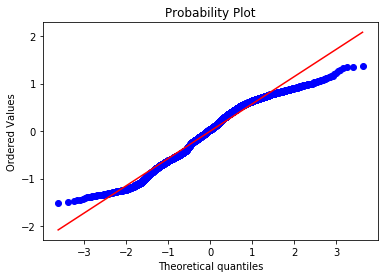

In [40]:
# Verificando a suposição de que os erros têm distribuição Normal

stats.probplot(logresults.resid, dist='norm', plot=plt);

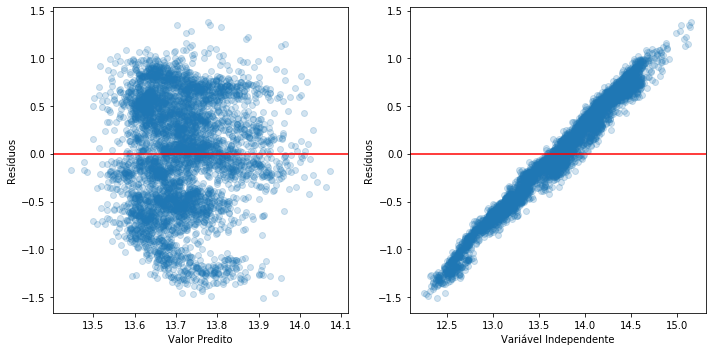

In [41]:
# Verificando a suposição de homocedasticidade na escala log:

fig = plt.figure(figsize = (10,5))

plt.subplot(121)
plt.scatter(logresults.predict(logxc), logresults.resid, alpha=0.2);
plt.axhline(y = 0, color = 'r', linestyle = '-');
plt.ylabel('Resíduos')
plt.xlabel('Valor Predito')

plt.subplot(122)
plt.scatter(logy, logresults.resid, alpha=0.2); # o valor da variável aleatórias está correto ?
plt.axhline(y = 0, color = 'r', linestyle = '-');
plt.ylabel('Resíduos')
plt.xlabel('Variável Independente')

plt.tight_layout()
plt.show()

* 2° Modelo a ser utilizado: 

In [42]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

* Médias móveis - k vizinhos mais próximos

### Fazendo um modelo de random Forest! 

In [70]:
from sklearn.model_selection import train_test_split

columns = df.columns.drop(['weeklysales', 'date'])
columns

Index(['store', 'holiday', 'temperature', 'fuel', 'cpi', 'unemployment',
       'year', 'month'],
      dtype='object')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df[columns],df['weeklysales'], test_size=0.25)

In [72]:
tree_rf = RandomForestRegressor()

In [73]:
model_rf = tree_rf.fit(X_train, y_train)

resultado_rf = model_rf.predict(X_test)

C:\Users\camil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
mean_squared_error(y_test, resultado_rf)

21817310567.79938

In [75]:
model_rf.score(X_test,y_test)

0.930511082134145

In [76]:
from sklearn.model_selection import GridSearchCV # GridSearchCV faz teste exaustivamente encontrando os melhores parâmetros 

In [77]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]} # vamos especificar os parâmetros que eu quero ajustar para melhorar

# valores mínimosde amostras para serem testadas na folha da árvore // valores mínimos de amostras para fazer a divisão do módulo interno, ajuda em deixar o modelo mais fluido. // árvores de decisão

In [78]:
rf = RandomForestRegressor() #qual regressão vou usar 
grid = GridSearchCV(rf, parametros)

In [79]:
grid.fit(X_train, y_train)

C:\Users\camil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [1, 10

In [80]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}

In [81]:
rf_best = grid.best_estimator_
resultado_final = rf_best.predict(X_test)

In [82]:
mean_squared_error(y_test, resultado_final)

18268283590.053978

In [83]:
rf_best.score(X_test,y_test)

0.9418148605441312

In [85]:
rf_best.predict(X_test)


array([ 955488.80971011,  632664.99568911,  591785.94329275, ...,
        369018.04146364,  390315.52721608, 1479341.36220058])

## - Processo e Estatísticas de Validação -

##### Validação do modelo 1: Regressão Linear Múltipla

In [58]:
beta0_1 = logresults.params[0]
beta1_1 = logresults.params[1]
beta2_1 = logresults.params[2]
beta3_1 = logresults.params[3]
beta4_1 = logresults.params[4]

def f_modelo1(feature1, feature2, feature3, feature4): # função que prevê, dados os features, um valor previsto para weeklysales
    return beta0_1 + beta1_1*feature1 + beta2_1*feature2 + beta3_1*feature3 + beta4_1*feature4

teste_1 = df_teste_log.weeklysales
predicoes_1 = f_modelo1(df_teste_log.temperature, df_teste_log.cpi, df_teste_log.unemployment, df_teste_log.month)
residuos_1 = teste_1 - predicoes_1 #lista de residuos
soma = 0
for resid in residuos_1:
    soma += resid**2
RMS_modelo1 = np.sqrt(soma/len(df_teste_log))
print(f'Raiz do erro quadrático médio do modelo 1(RMS): {RMS_modelo1:.5f}')

Raiz do erro quadrático médio do modelo 1(RMS): 0.58424


In [59]:
def r_squared(dados, modelo):
    numerador = 0
    denominador = 0
    for i in range(len(modelo)):
        numerador += (dados[i]-modelo[i])**2
        denominador += (dados[i]-np.mean(dados))**2
    return 1 - numerador/denominador

In [60]:
r_sqr_1 = r_squared(list(teste_1),list(predicoes_1))
print(f'r quadrado do modelo 1: {r_sqr_1:.5f}')

r quadrado do modelo 1: 0.01005


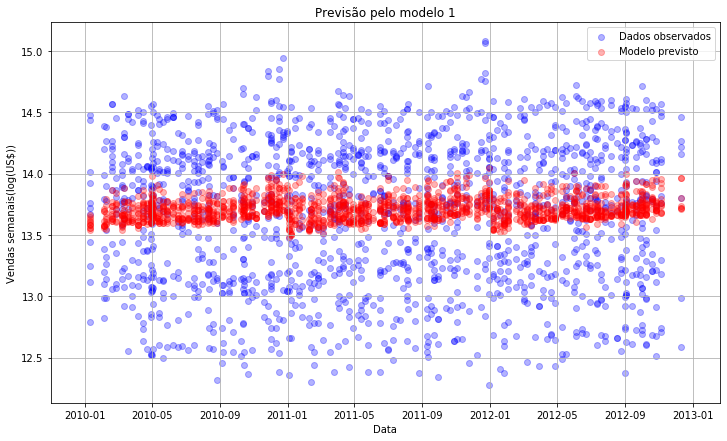

In [61]:
y_teste = df_teste_log.weeklysales
y_previsto = f_modelo1(df_teste_log.temperature, df_teste_log.cpi, df_teste_log.unemployment, df_teste_log.month)
x = df_teste_log.date

plt.figure(figsize=(12,7))
plt.title('Previsão pelo modelo 1')
plt.scatter(x, y_teste, alpha='0.3', color='blue', label='Dados observados')
plt.scatter(x, y_previsto, alpha='0.3', color='red', label='Modelo previsto')
plt.xlabel('Data')
plt.ylabel('Vendas semanais(log(US$))')
plt.legend()
plt.grid(True)
plt.show()

##### Validação do modelo 2: Random Forest Regression

In [62]:
teste_2 = y_test
predicoes_2 = resultado_final
residuos_2 = teste_2 - predicoes_2 #lista de residuos
soma = 0
for resid in residuos_2:
    soma += resid**2
RMS_modelo2 = np.sqrt(soma/len(y_test))
print(f'Raiz do erro quadrático médio do modelo 2(RMS): {RMS_modelo2:.5f}')

Raiz do erro quadrático médio do modelo 2(RMS): 142425.21056


In [63]:
r_sqr_2 = r_squared(list(teste_2),list(predicoes_2))
print(f'r quadrado do modelo 2: {r_sqr_2:.5f}')

r quadrado do modelo 2: 0.93423


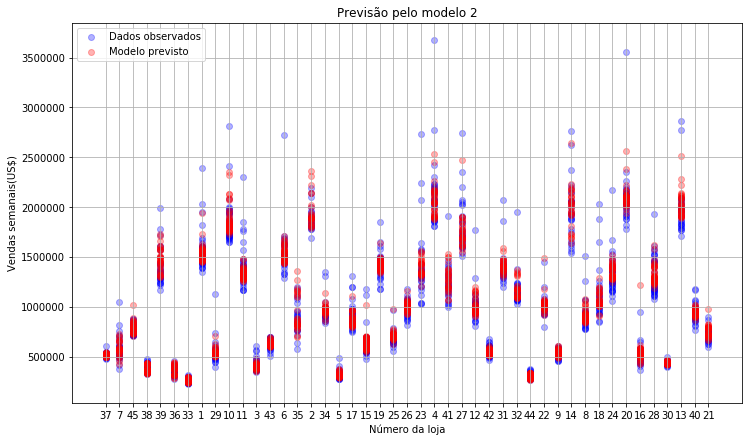

In [64]:
plt.figure(figsize=(12,7))
plt.title('Previsão pelo modelo 2')
plt.scatter(X_test.store, y_test, alpha='0.3', color='blue', label='Dados observados')
plt.scatter(X_test.store, resultado_final, alpha='0.3', color='red', label='Modelo previsto')
plt.xlabel('Número da loja')
plt.ylabel('Vendas semanais(US$)')
plt.legend()
plt.grid(True);

#### Rascunhos

In [65]:
# Validação do modelo 2 - gráfico com dados dos meses da base de teste previstos pelo modelo comparados com os dados esperados (os da base de teste)


In [66]:
# Define uma variavel chamada Y que é a copia da serie de dados:
Y = df_teste.weeklysales

# Define a variável window = 2 que será a janela de 2 valores:
window = 2

# Obtém os 5 primeiros valores da serie:
history = []
for i in range(window):
    history.append(Y.iloc[i])

# Obtém todos os valores após os 2 primeiros:
teste_2 = []
for i in range(window, len(Y)):
    teste_2.append(Y.iloc[i])

# Cria lista de predições:
predicoes_2 = []

# percorre sobre os dados de treinamento...

for t in range(len(teste_2)):
    # Define a variável length com o tamanho da variável history:
    length = len(history)
    
    # Define a variável valor_predito com a média dos 3 valores correntes..
    valor_predito = []
    for i in range(length - window, length):
        valor_predito.append(history[i])
    valor_predito = np.mean(valor_predito)
    
    # Define a variável valor_real com o valor atual do teste..
    valor_real = teste_2[t]
    
    # Alimenta a lista de predições:
    predicoes_2.append(valor_predito)
    # Atualiza a lista history com os valores correntes..
    history.append(valor_real)
    

# Calcula a métrica de rms:
rms = np.sqrt(mean_squared_error(teste_2, predicoes_2))
# Imprime o valor de rms:
print('Métrica RMS: %.3f' % rms)

indices = [i for i in range(0, int(len(teste_2)))]
teste = go.Scatter(x=indices,y=teste_2,name = "Conjunto de teste",line = dict(color = '#330000'),opacity = 0.8)
MM_2 = go.Scatter(x=indices,y=predicoes_2,name = "Média Móvel 2 Períodos",line = dict(color = '#FF00FF'),opacity = 0.8)
data = [teste, MM_2]
layout = dict(title = "Teste set vs Média Móvel 2 períodos",title_x= 0.5)
fig = dict(data=data, layout=layout)
py.iplot(fig)

Métrica RMS: 666435.073


NameError: name 'go' is not defined

In [67]:
r_sqr_2 = r_squared(teste_2,predicoes_2)
r_sqr_2

-0.469563373002013

In [68]:
# Comparação e discussão dos resultados

In [69]:
# # scikit-learn k-fold cross-validation
# from numpy import array
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.svm import SVR
# # data sample
# df_analise2 = df_treinamento_log[['weeklysales','temperature','cpi','unemployment']]
# logx = df_analise2.iloc[:, [1,3]]
# scaler = MinMaxScaler(feature_range=(0, 1))
# logx = scaler.fit_transform(logx)
# logy = df_analise2.iloc[:,0]
# data = array(df_analise2)
# # prepare cross validation
# kfold = KFold(3, True, 1)
# # enumerate splits
# scores = []
# best_svr = SVR(kernel='rbf')
# for train, test in kfold.split(data):
#     print('train: %s, test: %s' % (data[train], data[test]))
#     X_train, X_test, y_train, y_test = logx[train], logx[test], logy[train], logy[test]
#     #best_svr.fit(X_train, y_train)
#     #scores.append(best_svr.score(X_test, y_test))
#     #print(scores)

## - Conclusão -

## - Referências Bibliográficas -

* https://d1wqtxts1xzle7.cloudfront.net/41933645/FORECAST_OF_SALES_OF_WALMART_STORE_USING_BIG_DATA_APPLICATIONS.pdf?1454491981=&response-content-disposition=inline%3B+filename%3DFORECAST_OF_SALES_OF_WALMART_STORE_USING.pdf&Expires=1605614440&Signature=DPer3zvFl7B5EM46LJWPgYXscJNdxbzVCfa308NyoF6sU9ydieGyJ0wbXUYIkQ5l9GWfB8d1GciSQtJPGLAwgjCWJ2f5267cw~gdIlOPukMk~TeRzlDOdRlIZJ~v2u6kUL0J0AlpLZZEgLIsFtJMwgeSrdCPuXGjIH67jWaTNEJxLuPRc70jIoita-hdS7n2HF1uSmHok7tUWeJVvAhMxqT~vZ-XKuJMb8OTGCkyhwVazQJ7RpwR406ffqcOST4aDrioWlof4iW~hXYQbtWBoHg-l4pSll8jD7EnhkHm3jxqz-L2soAs4KeCxC7Vjzk6PPvnH4nmtRxKqM~imc8auw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

* https://www.lume.ufrgs.br/bitstream/handle/10183/147496/000999425.pdf?sequence=1

* http://prcrepository.org:8080/xmlui/bitstream/handle/20.500.12475/174/FA-19_Articulo%20Final_Jose%20Santaella.pdf?sequence=1

* https://www.cse.scu.edu/~mwang2/projects/ML_KaggleM5Forecasting_20s.pdf

* https://medium.com/datadriveninvestor/walmart-sales-data-analysis-sales-prediction-using-multiple-linear-regression-in-r-programming-adb14afd56fb

* https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

* https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

* https://minerandodados.com.br/prevendo-dados-com-janelas-deslizantes-usando-python/

* https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833

* https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

* https://minerandodados.com.br/prevendo-a-demanda-de-alugueis-de-bicicletas-com-machine-learning/

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Commit:
    
Membros: Andressa, Camila, Luiz, Matheus